<a href="https://colab.research.google.com/github/TarunTejaYaram/Openl3---classification/blob/master/fen%C3%AAtre_texture_l3_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet CENSE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!cp /content/drive/My\ Drive/project/scenes_stereo.zip .
!unzip scenes_stereo.zip

Archive:  scenes_stereo.zip
   creating: scenes_stereo/
  inflating: scenes_stereo/bus01.wav  
  inflating: scenes_stereo/bus02.wav  
  inflating: scenes_stereo/bus03.wav  
  inflating: scenes_stereo/bus04.wav  
  inflating: scenes_stereo/bus05.wav  
  inflating: scenes_stereo/bus06.wav  
  inflating: scenes_stereo/bus07.wav  
  inflating: scenes_stereo/bus08.wav  
  inflating: scenes_stereo/bus09.wav  
  inflating: scenes_stereo/bus10.wav  
  inflating: scenes_stereo/busystreet01.wav  
  inflating: scenes_stereo/busystreet02.wav  
  inflating: scenes_stereo/busystreet03.wav  
  inflating: scenes_stereo/busystreet04.wav  
  inflating: scenes_stereo/busystreet05.wav  
  inflating: scenes_stereo/busystreet06.wav  
  inflating: scenes_stereo/busystreet07.wav  
  inflating: scenes_stereo/busystreet08.wav  
  inflating: scenes_stereo/busystreet09.wav  
  inflating: scenes_stereo/busystreet10.wav  
  inflating: scenes_stereo/office01.wav  
  inflating: scenes_stereo/office02.wav  
  inflatin

In [3]:
!pip3 uninstall tensorflow -y
!pip3 uninstall tensorflow-gpu -y
!pip3 install "tensorflow<1.14"
!pip3 install openl3

Uninstalling tensorflow-2.2.0:
  Successfully uninstalled tensorflow-2.2.0
     |████████████████████████████████| 92.6MB 94kB/s 
     |████████████████████████████████| 3.2MB 53.2MB/s 
     |████████████████████████████████| 368kB 50.3MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
     |████████████████████████████████| 337kB 6.8MB/s 
     |████████████████████████████████| 389kB 52.5MB/s 
     |████████████████████████████████| 25.4MB 92kB/s 
     |████████████████████████████████| 3.3MB 51.2MB/s 
     |████████████████████████████████| 26.9MB 114kB/s 
  Created wheel for openl3: filename=openl3-0.3.1-py2.py3-none-any.whl size=249323247 sha256=b80806af2f6953e70df1561a6d3157c47b74b2b072257213032f78deb926b511
  Stored in directory: /roo

In [0]:
import os
import numpy as np 
import matplotlib.pyplot as plt
from glob import glob
# import librosa as lr
import openl3
import soundfile as sf

## 1. Preprocessing

In [8]:
#set directory for source files 
data_dir = './scenes_stereo/'

audio_files = glob(data_dir + '*.wav')
print('file size:',len(audio_files))

file size: 100


In [25]:
data_list = glob(data_dir+"/*")
data = []

# for name in ['bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation']:
#     for k in range(1,10):
#         data.append(lr.feature.mfcc(lr.load(data_dir+name + '0'+str(k)+'.wav')[0],n_mfcc = 40))
#     data.append(lr.feature.mfcc(lr.load(data_dir+name + '10'+'.wav')[0],n_mfcc = 40))

for name in ['bus','busystreet','office','openairmarket','park','quietstreet','restaurant','supermarket','tube','tubestation']:
    for k in range(1,10):
      audio, sr = sf.read(data_dir+name + '0'+str(k)+'.wav')
      data.append(openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="linear", embedding_size=512))
    audio, sr = sf.read(data_dir+name + '10.wav')
    data.append(openl3.get_audio_embedding(audio, sr, content_type="env", input_repr="linear", embedding_size=512))

OpenL3Error: ignored

In [17]:
print (data[1:100])
import pickle

with open("data.txt", "wb") as fp:   #Pickling
  pickle.dump(data, fp)

[(array([[1.8833089, 1.3697667, 3.1900542, ..., 2.1640203, 4.1440883,
        1.7087735],
       [2.5887716, 1.4625838, 3.2088592, ..., 1.9528415, 4.318914 ,
        1.6786159],
       [2.4029446, 1.4942849, 3.300157 , ..., 1.939378 , 4.251728 ,
        2.0281475],
       ...,
       [1.9647324, 1.374155 , 3.4082308, ..., 2.2697003, 3.751704 ,
        2.254499 ],
       [1.8752828, 1.2873453, 3.2469788, ..., 2.2895815, 3.9409342,
        1.9343631],
       [1.7644867, 1.140817 , 3.263881 , ..., 2.369049 , 3.9999847,
        1.9780753]], dtype=float32), array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
   

In [30]:
datanp = np.array(data)
datanp.shape

(0,)

In [32]:
np.mean(datanp,axis=1).shape

IndexError: ignored

In [0]:
.
labels = [] # Labels des échantillons
for k in range(10):
    labels = labels+[k]*10
    
dict_labels = {'bus':0,'busystreet':1,'office':2,'openairmarket':3,'park':4,'quietstreet':5,'restaurant':6,'supermarket':7,'tube':8,'tubestation':9} 

## 2. Texture window

In [0]:
def wind_texture(M,wsize):
    """Calcul les moyennes temporelles des fenêtres de textures dans une matrice de MFCC.

    M : Matrice de MFCC au format Quefrence x temps
    wsize : Nombre de trames retenues dans la fenêtre"""

    n,m = M.shape
    nwind = m//wsize
    
    W = np.zeros((n,nwind))
    
    for i in range (nwind):
        W[:,i] = np.mean(M[:,i*wsize:(i+1)*wsize],axis=1)
    
    return(W)

In [0]:
def dist_wind_approximate(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.zeros((m,1))
    
    for k in range(m):
        distxy[k] = np.linalg.norm(x[:,k]-y[:,k])

    return min(distxy)

In [0]:
def p_at_k(mat_dist,K=5,labels=labels):
    p5 = np.zeros(100)
    for k in range(100):
        dist = mat_dist[k,:]
        distsort = np.argsort(np.ravel(dist))

        p5[k] = np.sum([labels[distsort[i]]==labels[k] for i in range(1,K+1)])/K
    return(np.mean(p5))

In [23]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0


for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind_approximate(data[i],data[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)


AttributeError: ignored

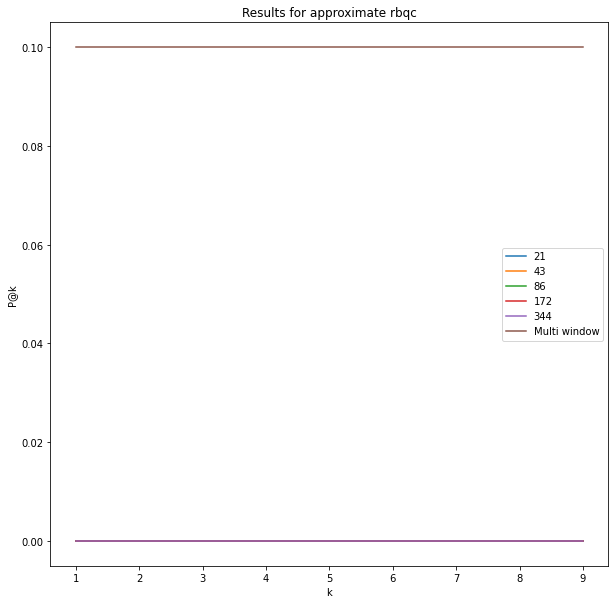

In [24]:

precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for approximate rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()

In [0]:
def dist_wind(A,B,wsize):
    
    x = wind_texture(A,wsize)
    y = wind_texture(B,wsize)
    
    n,m = np.shape(x)
    distxy = np.float('Inf')
    
    for k in range(m):
        distxy = min(distxy, min(np.linalg.norm(np.transpose(y)-x[:,k], axis=1)))

    return distxy

In [0]:
seq_size = [21, 43, 86, 172, 344] #  0.5s 1s 2s 4s 8s
mat_dist = np.zeros((len(seq_size), 100,100))
precision = np.zeros((len(seq_size),9))
num = 0

for n, windsize in enumerate(seq_size):
    for i in range(100):
        for j in range(i,100):
            mat_dist[n, i,j] = dist_wind(data[i],data[j],windsize)
            mat_dist[n, j,i] = mat_dist[n, i,j]

    for k in range(1,10):
        precision[n,k-1] = p_at_k(mat_dist[n, :, :],k)

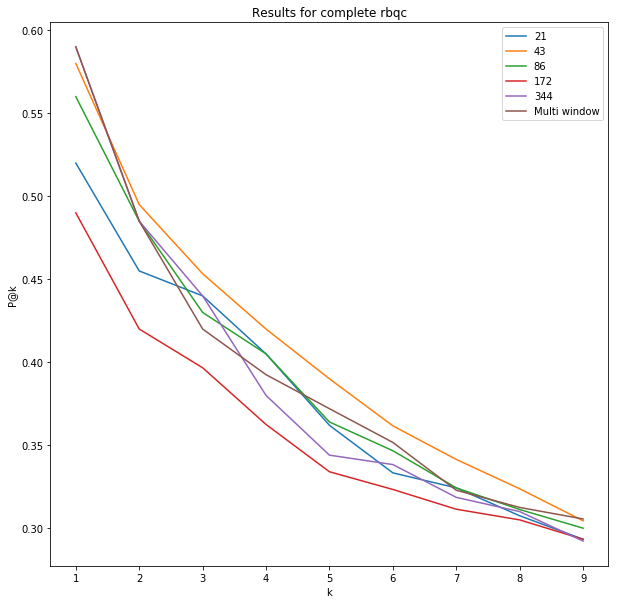

In [0]:

precisionMult = np.zeros(9)
for k in range(1,10):
    precisionMult[k-1] = p_at_k(mat_dist.sum(axis=0),k)

plt.figure(figsize=(10,10))    
for i in range(len(seq_size)):
    plt.plot(range(1,10),precision[i,:],label=seq_size[i])
plt.plot(range(1,10),precisionMult,label = 'Multi window')
plt.title('Results for complete rbqc')
plt.xlabel('k')
plt.ylabel('P@k')
plt.legend()
plt.show()